In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
# read scraped data

data_path = r"C:\Users\isDev\OneDrive\Documents\PythonScripts\webscraping\batting_players.csv"
df = pd.read_csv(data_path)

In [3]:
# print data

df.head(n=10)

,Name,Yrs,From,To,ASG,G,PA,AB,R,H,...,SO,BA,OBP,SLG,OPS,WAR,Birthdate,Debut,Birthplace,Pos
0,Bobby Abreu,18,1996,2014,2,2425,10081,8480,1453.0,2470.0,...,1840.0,0.291,0.395,0.475,0.870,60.17,"Mar 11, 1974","Sep 1, 1996","Maracay, Aragua",*9DH7/8
1,Wilyer Abreu,2,2023,2024,0,81,274,245,36.0,70.0,...,72.0,0.286,0.358,0.482,0.839,2.65,"Jun 24, 1999","Aug 22, 2023","Maracaibo, Zulia",9/7H8D
2,Ronald Acuña Jr.,7,2018,2024,4,722,3254,2818,581.0,815.0,...,719.0,0.289,0.379,0.525,0.904,25.82,"Dec 18, 1997","Apr 25, 2018","La Guaira, La Guaira",*987D/H
3,Ehire Adrianza,12,2013,2024,0,624,1578,1394,187.0,330.0,...,312.0,0.237,0.307,0.352,0.658,0.76,"Aug 21, 1989","Sep 8, 2013","Guarenas, Miranda",H65473/9D18
4,Jesús Aguilar,10,2014,2023,1,795,2658,2348,288.0,594.0,...,622.0,0.253,0.322,0.446,0.768,3.50,"Jun 30, 1990","May 15, 2014","Maracay, Aragua",*3HD/5
5,Edgardo Alfonzo,12,1995,2006,1,1506,6108,5385,777.0,1532.0,...,617.0,0.284,0.357,0.425,0.782,28.74,"Nov 8, 1973","Apr 26, 1995","Santa Teresa del Tuy, Miranda",*5*4H6/D3
6,Eliézer Alfonzo,6,2006,2011,0,193,624,591,44.0,142.0,...,158.0,0.240,0.271,0.377,0.648,-0.02,"Feb 7, 1979","Jun 3, 2006","Puerto La Cruz, Anzoategui",2H
7,Jose Altuve,14,2011,2024,8,1730,7635,6919,1097.0,2120.0,...,961.0,0.306,0.363,0.469,0.833,50.97,"May 6, 1990","Jul 20, 2011","Puerto Cabello, Carabobo",*4D/H6
8,José Alvarado,8,2017,2024,0,70,1,1,0.0,0.0,...,1.0,0.000,0.000,0.000,0.000,4.29,"May 21, 1995","May 3, 2017","Maracaibo, Zulia",*1/3
9,Clemente Álvarez,1,2000,2000,0,2,5,5,1.0,1.0,...,1.0,0.200,0.200,0.200,0.400,-0.06,"May 18, 1968","Sep 19, 2000","Guanta, Anzoategui",/2H


In [4]:
# statistics for venezuelan players

df.describe()

,Yrs,From,To,ASG,G,PA,AB,R,H,2B,...,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,WAR
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,477.000000,478.000000,477.000000,394.000000,394.000000,394.000000,394.000000,480.000000
mean,5.458333,2006.087500,2011.100000,0.352083,302.685417,1016.547917,919.785417,115.230126,242.361925,44.824268,...,108.516736,16.504184,7.142558,73.248954,165.303983,0.197320,0.244688,0.278462,0.523208,4.234438
std,4.481269,14.582594,14.115775,1.311184,501.308046,1980.180915,1783.046884,239.718479,490.074064,91.796823,...,231.166132,51.794212,19.003665,163.146250,308.786861,0.114313,0.126957,0.165672,0.282508,9.742787
min,1.000000,1939.000000,1944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.450000
25%,2.000000,2000.000000,2005.000000,0.000000,10.750000,2.750000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.143000,0.188250,0.167000,0.370000,-0.260000
50%,4.000000,2009.000000,2015.000000,0.000000,69.500000,74.500000,67.500000,6.000000,11.500000,2.000000,...,4.000000,0.000000,0.000000,4.000000,21.000000,0.226000,0.282000,0.322500,0.597500,0.140000
75%,8.000000,2017.000000,2022.000000,0.000000,348.000000,936.750000,877.750000,98.500000,227.000000,41.000000,...,91.750000,6.000000,4.000000,56.750000,169.000000,0.258000,0.315000,0.379000,0.688000,3.885000
max,24.000000,2024.000000,2024.000000,13.000000,2968.000000,12013.000000,10586.000000,1551.000000,3174.000000,627.000000,...,1881.000000,506.000000,167.000000,1476.000000,2105.000000,1.000000,1.000000,1.286000,2.000000,67.140000


In [5]:
# explore data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        480 non-null    object 
 1   Yrs         480 non-null    int64  
 2   From        480 non-null    int64  
 3   To          480 non-null    int64  
 4   ASG         480 non-null    int64  
 5   G           480 non-null    int64  
 6   PA          480 non-null    int64  
 7   AB          480 non-null    int64  
 8   R           478 non-null    float64
 9   H           478 non-null    float64
 10  2B          478 non-null    float64
 11  3B          478 non-null    float64
 12  HR          478 non-null    float64
 13  RBI         478 non-null    float64
 14  SB          478 non-null    float64
 15  CS          477 non-null    float64
 16  BB          478 non-null    float64
 17  SO          477 non-null    float64
 18  BA          394 non-null    float64
 19  OBP         394 non-null    f

In [6]:
# drop NA values

df_without_na = df.dropna(subset=["From"]).reset_index(drop=True)
df_without_na

,Name,Yrs,From,To,ASG,G,PA,AB,R,H,...,SO,BA,OBP,SLG,OPS,WAR,Birthdate,Debut,Birthplace,Pos
0,Bobby Abreu,18,1996,2014,2,2425,10081,8480,1453.0,2470.0,...,1840.0,0.291,0.395,0.475,0.870,60.17,"Mar 11, 1974","Sep 1, 1996","Maracay, Aragua",*9DH7/8
1,Wilyer Abreu,2,2023,2024,0,81,274,245,36.0,70.0,...,72.0,0.286,0.358,0.482,0.839,2.65,"Jun 24, 1999","Aug 22, 2023","Maracaibo, Zulia",9/7H8D
2,Ronald Acuña Jr.,7,2018,2024,4,722,3254,2818,581.0,815.0,...,719.0,0.289,0.379,0.525,0.904,25.82,"Dec 18, 1997","Apr 25, 2018","La Guaira, La Guaira",*987D/H
3,Ehire Adrianza,12,2013,2024,0,624,1578,1394,187.0,330.0,...,312.0,0.237,0.307,0.352,0.658,0.76,"Aug 21, 1989","Sep 8, 2013","Guarenas, Miranda",H65473/9D18
4,Jesús Aguilar,10,2014,2023,1,795,2658,2348,288.0,594.0,...,622.0,0.253,0.322,0.446,0.768,3.50,"Jun 30, 1990","May 15, 2014","Maracay, Aragua",*3HD/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Carlos Zambrano,12,2001,2012,3,365,744,693,75.0,165.0,...,240.0,0.238,0.248,0.388,0.636,43.87,"Jun 1, 1981","Aug 20, 2001","Puerto Cabello, Carabobo",*1H
476,Eddie Zambrano,2,1993,1994,0,75,151,133,18.0,35.0,...,32.0,0.263,0.351,0.451,0.802,0.69,"Feb 1, 1966","Sep 19, 1993","Maracaibo, Zulia",H/9375
477,Víctor Zambrano,7,2001,2007,0,49,82,73,3.0,9.0,...,28.0,0.123,0.135,0.164,0.300,5.07,"Aug 6, 1975","Jun 21, 2001","Los Teques, Miranda",1
478,Mauro Zárate,1,2007,2007,0,4,0,0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,-0.15,"Feb 8, 1983","Aug 7, 2007","Valencia, Carabobo",/1


In [7]:
# venezuelan players in baseball history (total years)

start = df.From.min()
end = df.To.max()

end - start

85

In [8]:
# players by yrs

new_players_by_yrs = df_without_na.From.value_counts()
new_players_by_yrs.index = pd.to_datetime(new_players_by_yrs.index, format="%Y")
new_players_by_yrs.sort_index(inplace=True)
new_players_by_yrs

From
1939-01-01     1
1944-01-01     1
1946-01-01     1
1950-01-01     1
1953-01-01     1
              ..
2020-01-01    17
2021-01-01    12
2022-01-01    24
2023-01-01    11
2024-01-01     7
Name: count, Length: 63, dtype: int64

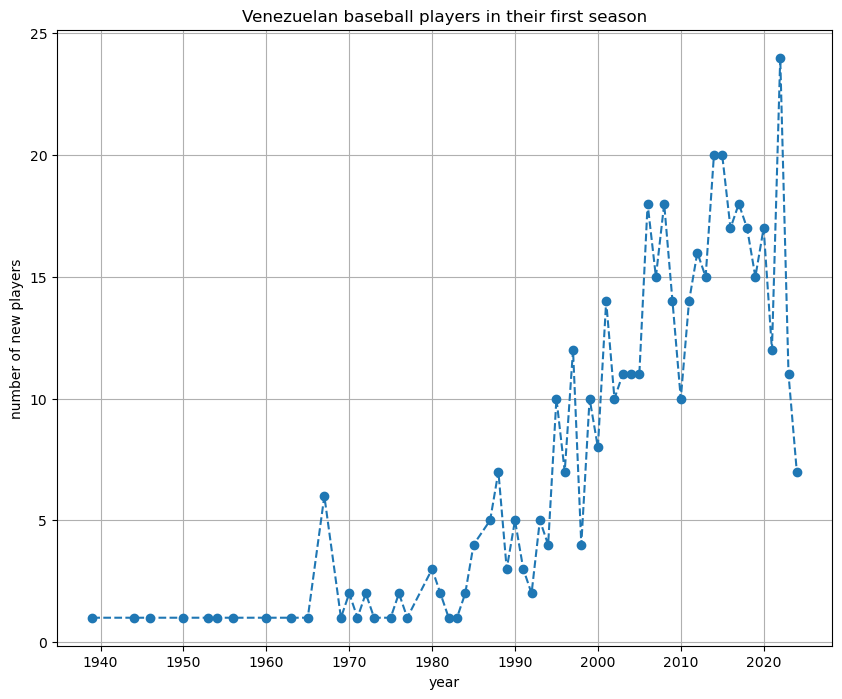

In [9]:
# plot new players by yrs

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(new_players_by_yrs.index, new_players_by_yrs.values, marker="o", linestyle="--")
ax.set_xlabel("year")
ax.set_ylabel("number of new players")
ax.set_title("Venezuelan baseball players in their first season")
ax.grid()

plt.show()

In [10]:
# total players by birthplace

birthplace_series = df["Birthplace"].dropna()

states = []
for birthplace in birthplace_series:
    state = birthplace.split(",")

    if len(state) == 2:
        states.append(state[1].strip())

birthplaces = {birthplace: states.count(birthplace) for birthplace in states}

# fix some states
birthplaces["Zulia"] = 58
birthplaces["Aragua"] = 57

del birthplaces["Zuila"]
del birthplaces["Maracay"]

birthplaces["Anzoátegui"] = birthplaces.pop("Anzoategui")
birthplaces["Bolívar"] = birthplaces.pop("Bolivar")
birthplaces["Mérida"] = birthplaces.pop("Merida")
birthplaces["Guárico"] = birthplaces.pop("Guarico")
birthplaces["Falcón"] = birthplaces.pop("Falcon")
birthplaces["Táchira"] = birthplaces.pop("Tachira")
birthplaces["Distrito Capital"] = birthplaces.pop("Distrito Federal")

birthplaces

{'Aragua': 57,
 'Zulia': 58,
 'La Guaira': 17,
 'Miranda': 28,
 'Carabobo': 71,
 'Yaracuy': 5,
 'Lara': 40,
 'Sucre': 21,
 'Monagas': 6,
 'Trujillo': 5,
 'Nueva Esparta': 5,
 'Portuguesa': 5,
 'Barinas': 2,
 'Vargas': 1,
 'Cojedes': 3,
 'Delta Amacuro': 1,
 'Anzoátegui': 35,
 'Bolívar': 29,
 'Mérida': 2,
 'Guárico': 8,
 'Falcón': 5,
 'Táchira': 3,
 'Distrito Capital': 71}

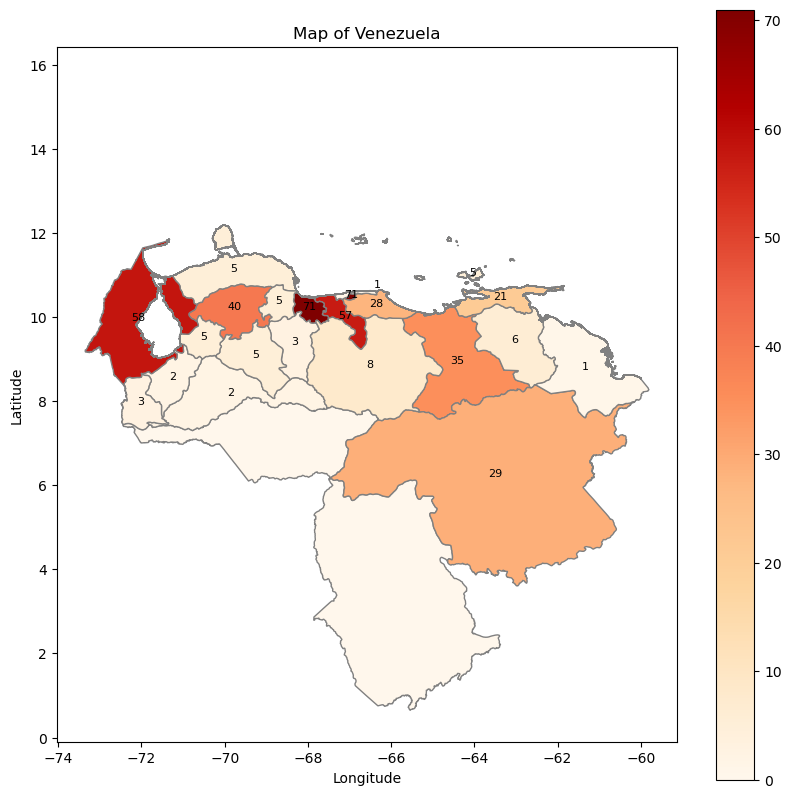

In [11]:
# states players come from the most

shapefile_path = r"C:\Users\isDev\Downloads\gadm41_VEN_shp\gadm41_VEN_1.shp"
venezuela_states = gpd.read_file(shapefile_path)
venezuela_states["players"] = venezuela_states["NAME_1"].apply(lambda x: birthplaces.get(x, 0))

fig, ax = plt.subplots(figsize=(10, 10))
venezuela_states.plot(column="players", ax=ax, cmap="OrRd", edgecolor="gray", legend=True)
ax.set_title("Map of Venezuela")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

for idx, row in venezuela_states.iterrows():
    state = row["NAME_1"]
    if state in birthplaces:
        number_of_baseball_players = birthplaces[state]
        if state == "Vargas":
            bounds = row.geometry.bounds
            midpoint_right = (bounds[2], (bounds[1] + bounds[3]) / 2)
            ax.annotate(text=str(number_of_baseball_players), xy=midpoint_right, ha="center", fontsize=8, color="black")
        else:
            ax.annotate(text=str(number_of_baseball_players), xy=row.geometry.centroid.coords[0], ha="center", fontsize=8, color="black")

plt.show()

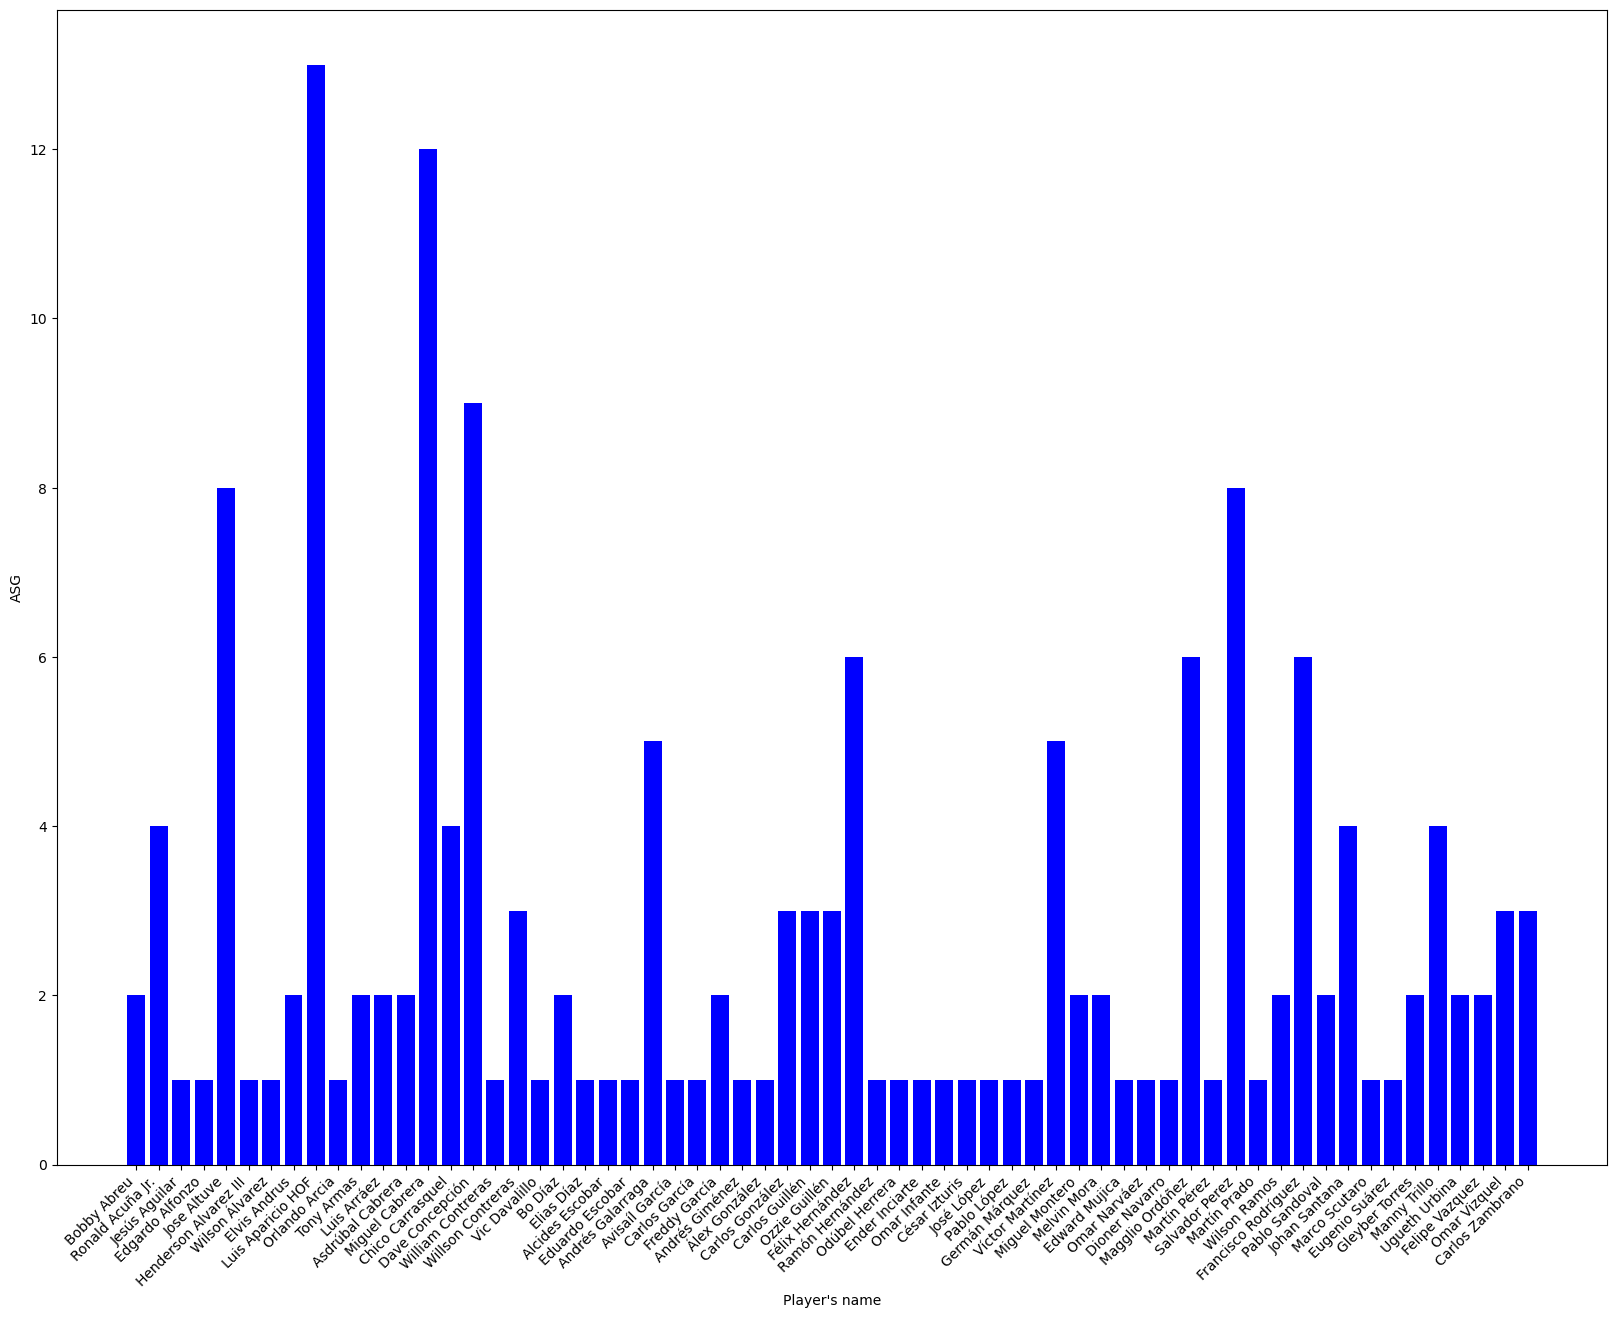

In [12]:
# most all star games played

df_all_star_games = df[df["ASG"] != 0].dropna(subset=["Name"]).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 15))
ax.bar(df_all_star_games["Name"], df_all_star_games["ASG"], color="blue")
ax.set_xlabel("Player's name")
ax.set_ylabel("ASG")
ax.set_xticks(df_all_star_games.index)
ax.set_xticklabels(df_all_star_games["Name"], rotation=45, ha="right")

plt.show()

In [13]:
# upload players data

players_data_path = r"C:\Users\isDev\OneDrive\Documents\PythonScripts\webscraping\personal_data"

dataframes = []
for file in os.listdir(players_data_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(players_data_path, file))

        name = file.split(".")[0]
        
        df.insert(0, "name", name)

        dataframes.append(df)

df_players_data = pd.concat(dataframes, ignore_index=True)
df_players_data

,name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos.1,Awards.1
0,Adbert Alzolay,2019.0,24.0,CHC,NL,4.0,5.0,5.0,0.0,0.0,...,-1,-0.1,0.484,0.500,-0.1,0.0,-1,NaN,/1,NaN
1,Adbert Alzolay,2021.0,26.0,CHC,NL,28.0,33.0,31.0,1.0,2.0,...,-2,-0.2,0.493,0.499,-0.2,0.0,-2,NaN,1/H,NaN
2,Adrián Sanchez,2017.0,26.0,WSN,NL,34.0,75.0,71.0,6.0,19.0,...,2,0.2,0.499,0.500,-0.1,0.4,-1,NaN,H4/65,NaN
3,Adrián Sanchez,2018.0,27.0,WSN,NL,28.0,59.0,58.0,8.0,16.0,...,1,0.1,0.497,0.499,0.1,0.0,1,NaN,4H/5,NaN
4,Adrián Sanchez,2019.0,28.0,WSN,NL,28.0,32.0,31.0,3.0,7.0,...,-1,-0.1,0.493,0.499,-0.1,0.0,-1,NaN,H/54637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Óscar Salazar,2002.0,24.0,DET,AL,8.0,23.0,21.0,2.0,4.0,...,-1,-0.1,0.477,0.499,0.0,-0.1,0,NaN,/4H56,NaN
2446,Óscar Salazar,2008.0,30.0,BAL,AL,34.0,94.0,81.0,13.0,23.0,...,8,0.8,0.513,0.503,0.7,0.0,7,NaN,H3/5D6,NaN
2447,Óscar Salazar,2009.0,31.0,TOT,MLB,72.0,154.0,139.0,16.0,42.0,...,0,0.0,0.492,0.499,0.4,-0.4,4,NaN,H/536D7,NaN
2448,Óscar Salazar,2010.0,32.0,SDP,NL,85.0,148.0,131.0,19.0,31.0,...,1,0.0,0.494,0.498,0.5,-0.5,5,"$400,000",H7/394,NaN


In [14]:
df_players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2450 non-null   object 
 1   Year      2285 non-null   float64
 2   Age       2285 non-null   float64
 3   Tm        2285 non-null   object 
 4   Lg        2285 non-null   object 
 5   G         2285 non-null   float64
 6   PA        2285 non-null   float64
 7   AB        2285 non-null   float64
 8   R         2285 non-null   float64
 9   H         2285 non-null   float64
 10  2B        2285 non-null   float64
 11  3B        2285 non-null   float64
 12  HR        2285 non-null   float64
 13  RBI       2285 non-null   float64
 14  SB        2285 non-null   float64
 15  CS        2284 non-null   float64
 16  BB        2285 non-null   float64
 17  SO        2284 non-null   float64
 18  BA        2058 non-null   float64
 19  OBP       2063 non-null   float64
 20  SLG       2058 non-null   floa

In [15]:
# transform data type for salary (from str to int)

df_players_data["Salary"] = df_players_data["Salary"].fillna(0)

def salary_as_int(text):
    if not isinstance(text, int):
        list_parts = text.split("$")[1].split(",")
    
        number = int("".join(list_parts))
    
        return number

    return text

df_players_data["Salary"] = df_players_data["Salary"].apply(salary_as_int)

df_players_data 

,name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos.1,Awards.1
0,Adbert Alzolay,2019.0,24.0,CHC,NL,4.0,5.0,5.0,0.0,0.0,...,-1,-0.1,0.484,0.500,-0.1,0.0,-1,0,/1,NaN
1,Adbert Alzolay,2021.0,26.0,CHC,NL,28.0,33.0,31.0,1.0,2.0,...,-2,-0.2,0.493,0.499,-0.2,0.0,-2,0,1/H,NaN
2,Adrián Sanchez,2017.0,26.0,WSN,NL,34.0,75.0,71.0,6.0,19.0,...,2,0.2,0.499,0.500,-0.1,0.4,-1,0,H4/65,NaN
3,Adrián Sanchez,2018.0,27.0,WSN,NL,28.0,59.0,58.0,8.0,16.0,...,1,0.1,0.497,0.499,0.1,0.0,1,0,4H/5,NaN
4,Adrián Sanchez,2019.0,28.0,WSN,NL,28.0,32.0,31.0,3.0,7.0,...,-1,-0.1,0.493,0.499,-0.1,0.0,-1,0,H/54637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Óscar Salazar,2002.0,24.0,DET,AL,8.0,23.0,21.0,2.0,4.0,...,-1,-0.1,0.477,0.499,0.0,-0.1,0,0,/4H56,NaN
2446,Óscar Salazar,2008.0,30.0,BAL,AL,34.0,94.0,81.0,13.0,23.0,...,8,0.8,0.513,0.503,0.7,0.0,7,0,H3/5D6,NaN
2447,Óscar Salazar,2009.0,31.0,TOT,MLB,72.0,154.0,139.0,16.0,42.0,...,0,0.0,0.492,0.499,0.4,-0.4,4,0,H/536D7,NaN
2448,Óscar Salazar,2010.0,32.0,SDP,NL,85.0,148.0,131.0,19.0,31.0,...,1,0.0,0.494,0.498,0.5,-0.5,5,400000,H7/394,NaN


In [16]:
# total salary per player

salary_per_player = df_players_data.groupby("name")["Salary"].sum()

salary_per_player

name
Adbert Alzolay             0
Adrián Sanchez             0
Al Pedrique            91000
Albert Suárez              0
Alberto Callaspo    18774500
                      ...   
Ángel Salazar         175000
Óscar Azócar          220000
Óscar Henríquez       170000
Óscar Hernández            0
Óscar Salazar         808500
Name: Salary, Length: 425, dtype: int64

In [17]:
salary_per_player.max()

print(salary_per_player.idxmax())

Miguel Cabrera


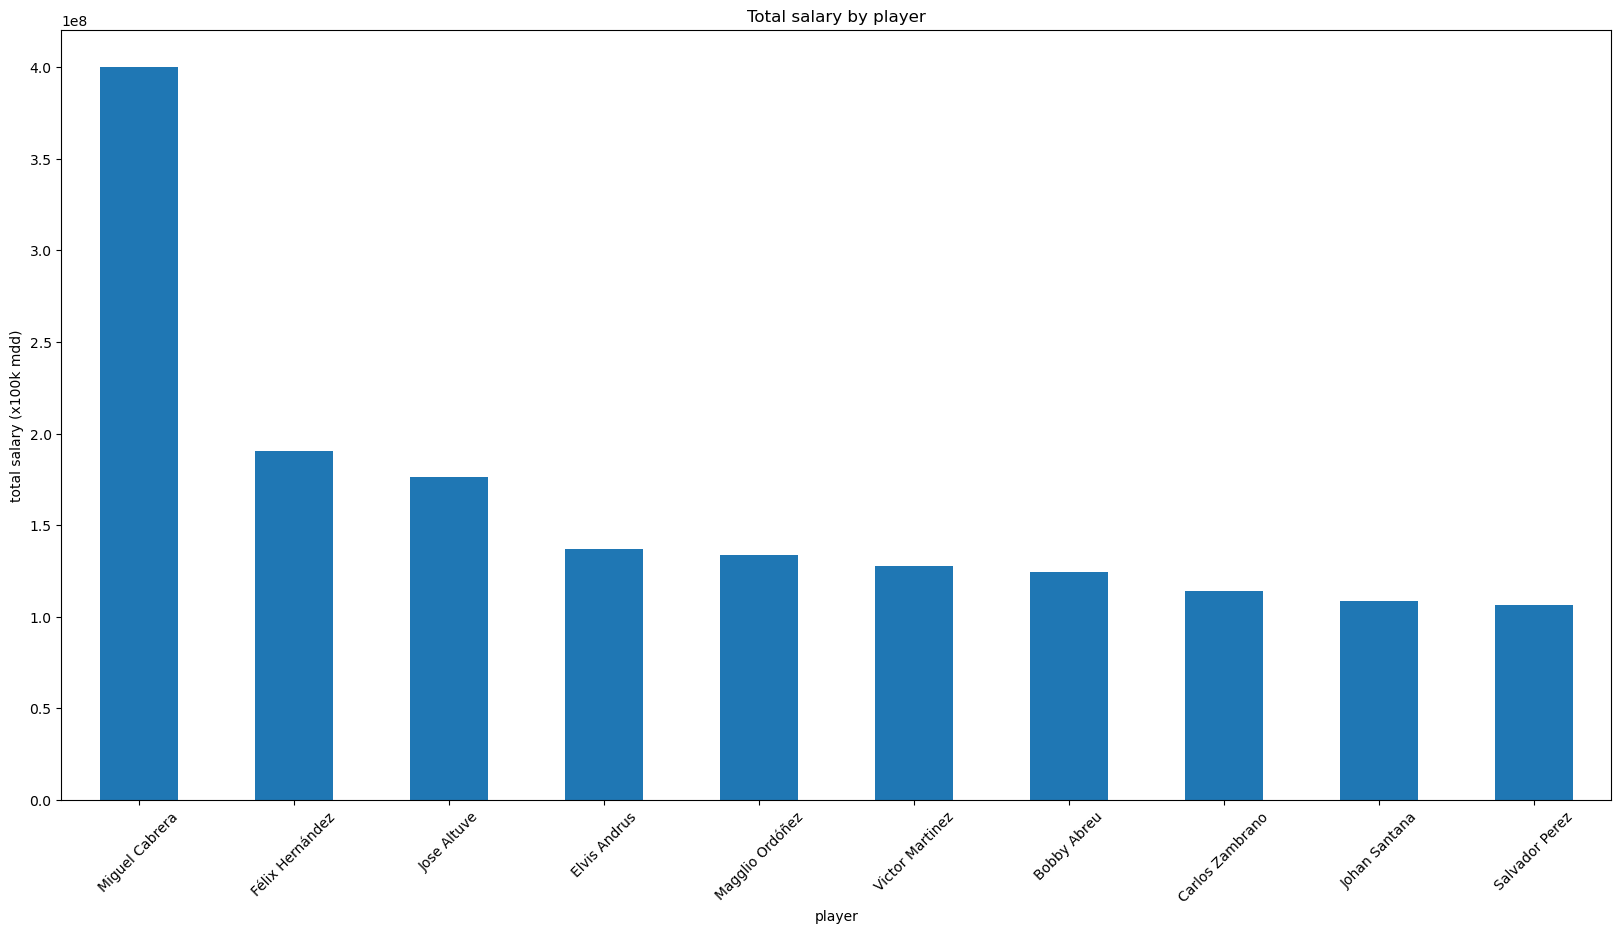

In [18]:
plt.figure(figsize=(20, 10))

salary_per_player.nlargest(10).plot(kind="bar")

plt.title('Total salary by player')
plt.xlabel('player')
plt.ylabel('total salary (x100k mdd)')
plt.xticks(rotation=45)

plt.show()

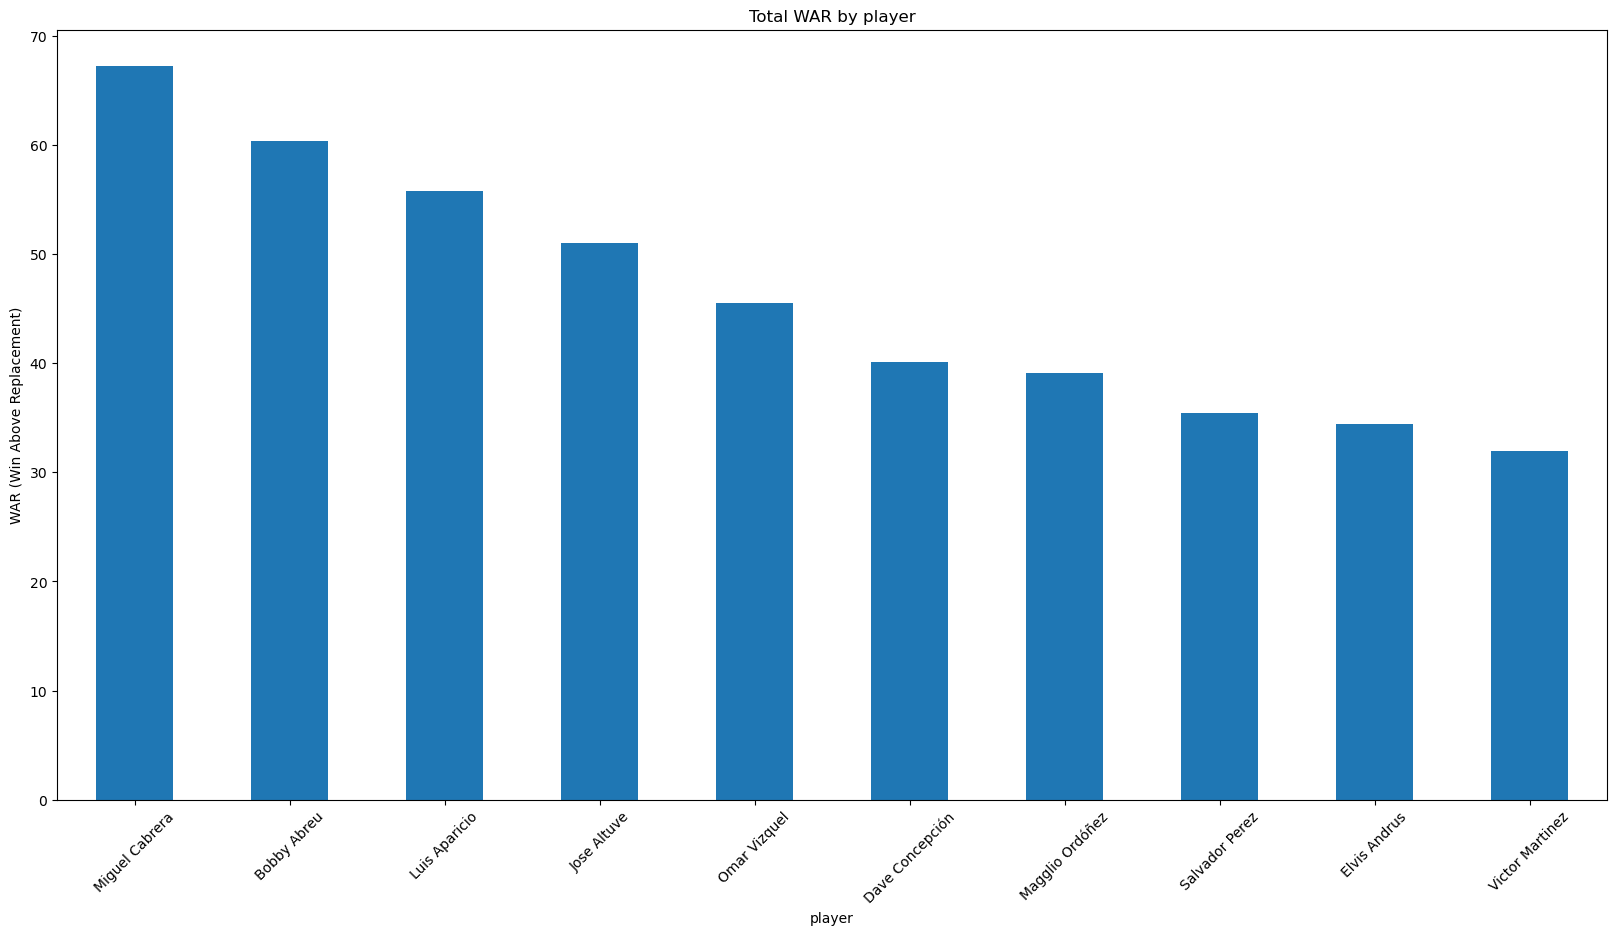

In [19]:
# WAR value by player

total_war_per_player = df_players_data.groupby("name")["WAR"].sum()

plt.figure(figsize=(20, 10))

total_war_per_player.nlargest(10).plot(kind="bar")

plt.title('Total WAR by player')
plt.xlabel('player')
plt.ylabel('WAR (Win Above Replacement)')
plt.xticks(rotation=45)

plt.show()

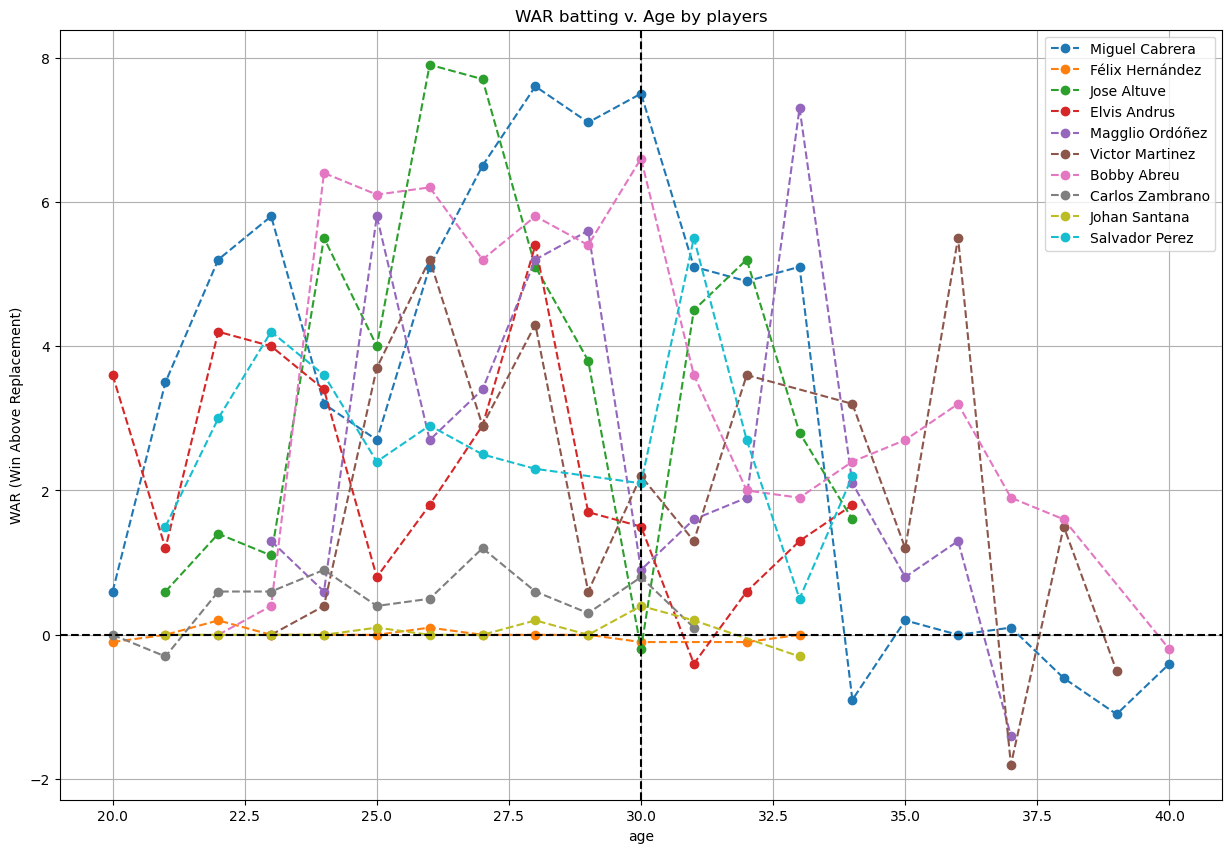

In [20]:
# WAR by age

player_by_most_earned = salary_per_player.nlargest(10)

fig, ax = plt.subplots(figsize=(15,10))
for name in player_by_most_earned.index:
    player = df_players_data[df_players_data["name"] == name]
    ax.plot(player.Age, player.WAR, marker="o", linestyle="--", label=name)

ax.set_xlabel("age")
ax.set_ylabel("WAR (Win Above Replacement)")
ax.set_title("WAR batting v. Age by players")
ax.axhline(y=0, color='black', linestyle='--')
ax.axvline(x=30, color='black', linestyle='--')
ax.legend()
ax.grid()

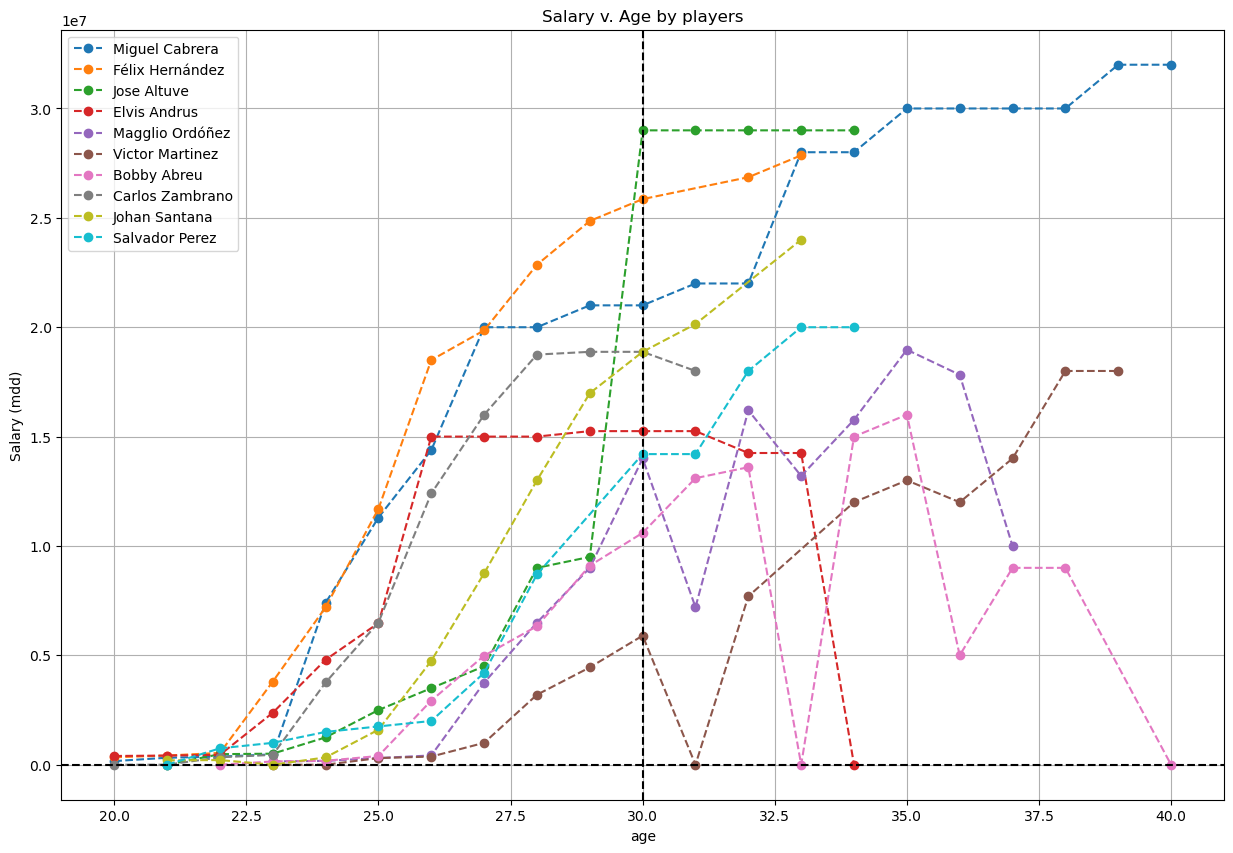

In [21]:
# salary by age

player_by_most_earned = salary_per_player.nlargest(10)

fig, ax = plt.subplots(figsize=(15,10))
for name in player_by_most_earned.index:
    player = df_players_data[df_players_data["name"] == name]
    ax.plot(player.Age, player.Salary, marker="o", linestyle="--", label=name)

ax.set_xlabel("age")
ax.set_ylabel("Salary (mdd)")
ax.set_title("Salary v. Age by players")
ax.axhline(y=0, color='black', linestyle='--')
ax.axvline(x=30, color='black', linestyle='--')
ax.legend()
ax.grid()

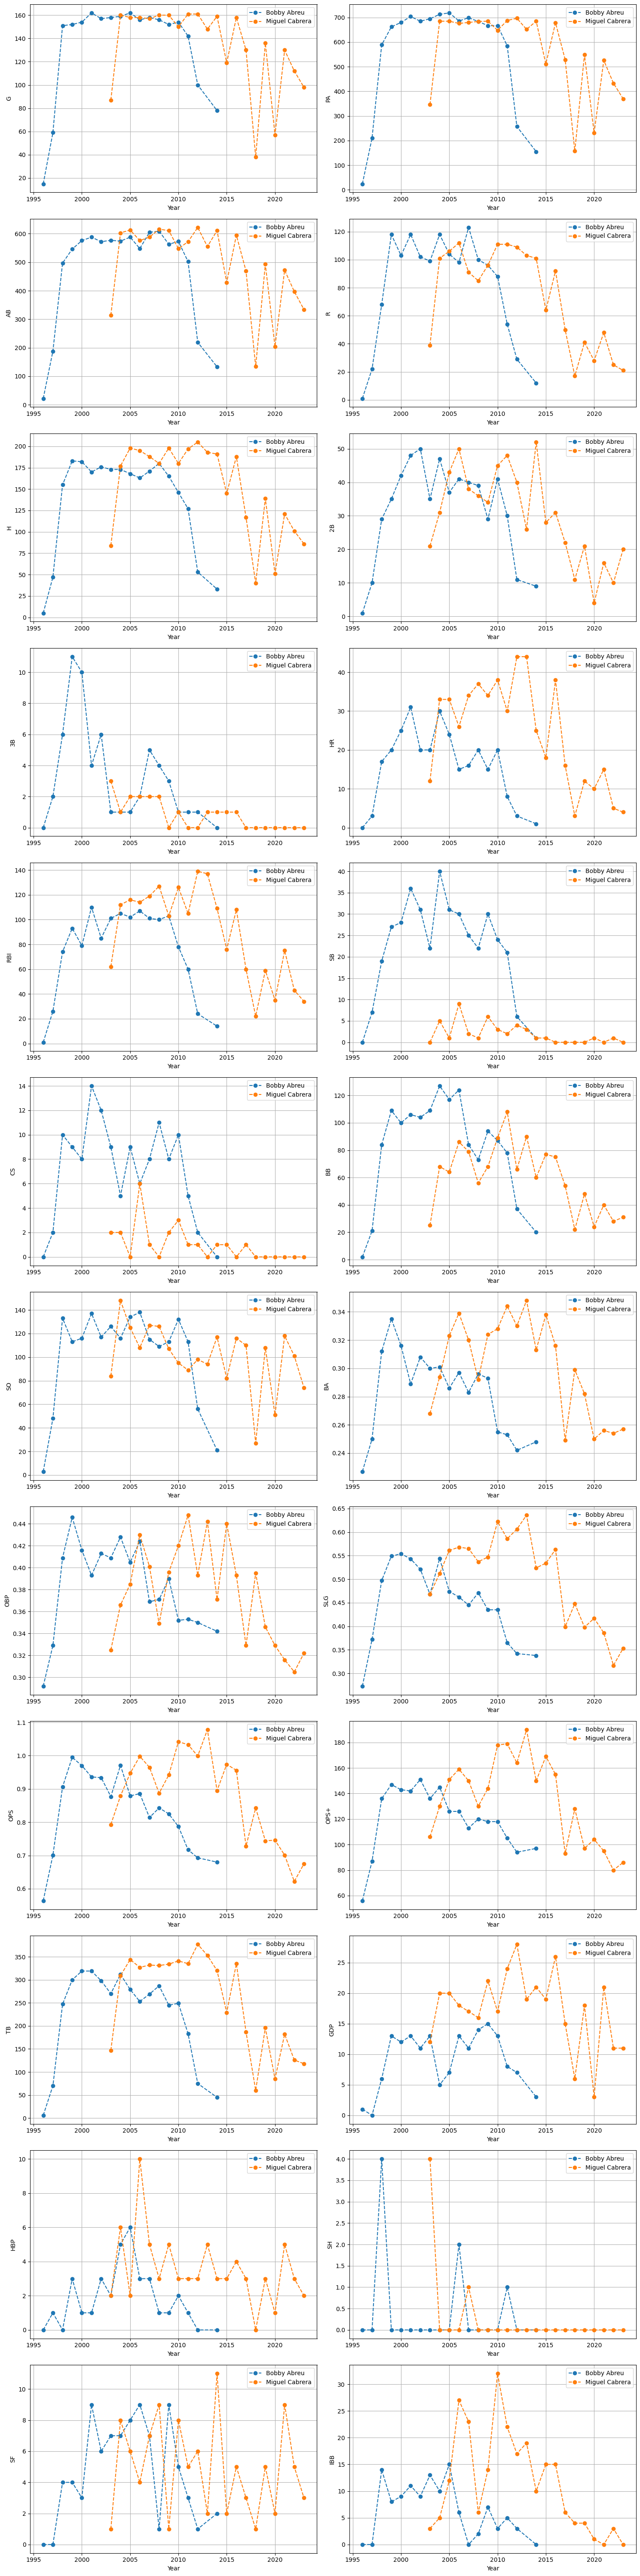

In [22]:
# comparison of two players

bobby_abreu = df_players_data[df_players_data["name"] == "Bobby Abreu"].iloc[:, :30]
miguel_cabrera = df_players_data[df_players_data["name"] == "Miguel Cabrera"].iloc[:, :30]

columns_to_plot = [col for col in bobby_abreu.columns if col not in ["Year", "name", "Age", "Tm", "Lg", "Pos",  "Awards"]]

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

for i, col in enumerate(columns_to_plot):
    row = i // 2
    col_idx = i % 2
    axs[row, col_idx].plot(bobby_abreu["Year"], bobby_abreu[col], marker="o", linestyle="--", label="Bobby Abreu")
    axs[row, col_idx].plot(miguel_cabrera["Year"], miguel_cabrera[col], marker="o", linestyle="--", label="Miguel Cabrera")
    axs[row, col_idx].set_xlabel("Year")
    axs[row, col_idx].set_ylabel(col)
    axs[row, col_idx].legend()
    axs[row, col_idx].grid()

plt.tight_layout()
plt.show()